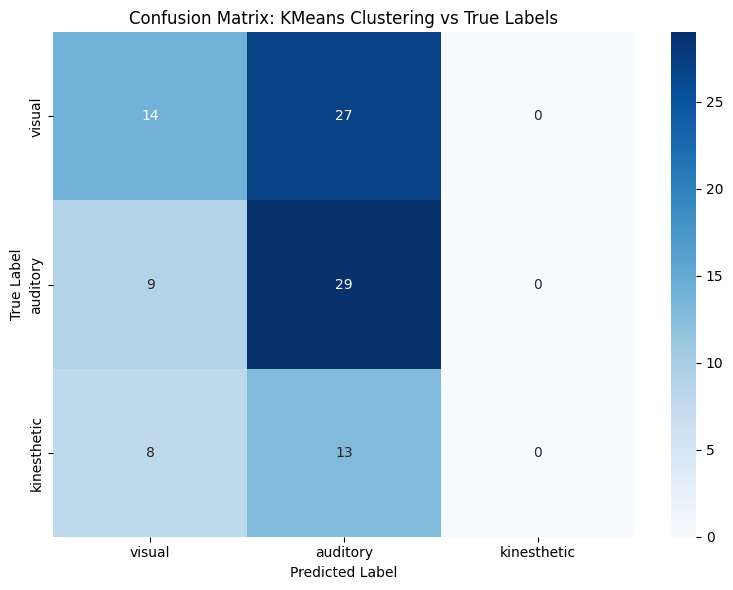

Accuracy: 0.43

Classification Report:

              precision    recall  f1-score   support

      visual       0.42      0.76      0.54        38
    auditory       0.00      0.00      0.00        21
 kinesthetic       0.45      0.34      0.39        41

    accuracy                           0.43       100
   macro avg       0.29      0.37      0.31       100
weighted avg       0.34      0.43      0.37       100



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.stats import mode

# Load dataset
df = pd.read_csv("/content/student_methods.csv")

# Features and true labels
X = df[['visual_score', 'auditory_score', 'kinesthetic_score']]
y_true = df['learning_style']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Map each cluster to the most common true label in that cluster
labels_map = {}
for i in range(3):
    mask = clusters == i
    most_common = y_true[mask].mode()[0]  # Use pandas mode to avoid scipy warnings
    labels_map[i] = most_common

# Assign predicted labels using the cluster-to-label mapping
y_pred = [labels_map[c] for c in clusters]

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=['visual', 'auditory', 'kinesthetic'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['visual', 'auditory', 'kinesthetic'],
            yticklabels=['visual', 'auditory', 'kinesthetic'])
plt.title('Confusion Matrix: KMeans Clustering vs True Labels')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Evaluation metrics with suppressed undefined metric warnings
accuracy = accuracy_score(y_true, y_pred)
report = classification_report(
    y_true, y_pred,
    target_names=['visual', 'auditory', 'kinesthetic'],
    zero_division=0
)

# Print accuracy and classification report
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n")
print(report)
